In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(43)
feature_1 = np.random.randn(100)   
noise = np.random.normal(0, 0.3, 100) 
feature_2 = feature_1 + noise   
data = np.column_stack((feature_1, feature_2))
training_data = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])



In [47]:
training_data

,Feature_1,Feature_2
0,0.257400,0.318503
1,-0.908481,-1.465438
2,-0.378503,-0.265046
3,-0.534916,-0.164074
4,0.858073,0.651082
...,...,...
95,-0.222436,-0.230051
96,0.096932,0.158520
97,-0.188384,-0.555476
98,1.591602,1.731831


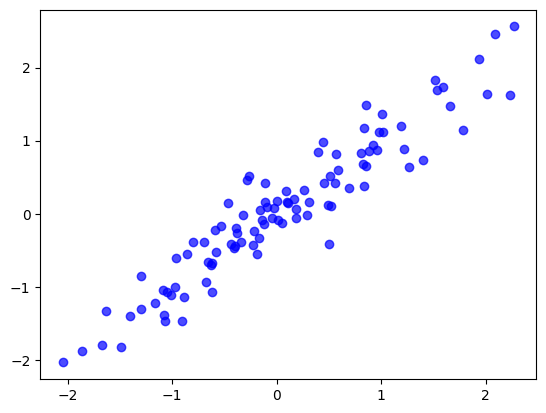

In [48]:
plt.scatter(training_data['Feature_1'], training_data['Feature_2'], color='blue', alpha=0.7)
plt.show()

In [49]:
def apply_pca(X, preserved_variance_percentage):
     
    X = np.array(X)
     
    covariance_matrix = np.cov(X.T)  
     
    Q, S, Qt = np.linalg.svd(covariance_matrix)  
 
    total_variance = np.sum(S)
    variance_sum = 0
    num_components = 0
    
    for variance in S:
        variance_sum += variance
        num_components += 1
        if (variance_sum / total_variance) >= preserved_variance_percentage:
            break
 
    principal_components = Qt[:num_components].T   
    projected_X = np.dot(X, principal_components)
 
    projected_X = pd.DataFrame(projected_X, columns=[f"PC{i+1}" for i in range(num_components)])
    
    return projected_X


In [50]:
projected_new = apply_pca(training_data,0.95)

In [51]:
training_data

,Feature_1,Feature_2
0,0.257400,0.318503
1,-0.908481,-1.465438
2,-0.378503,-0.265046
3,-0.534916,-0.164074
4,0.858073,0.651082
...,...,...
95,-0.222436,-0.230051
96,0.096932,0.158520
97,-0.188384,-0.555476
98,1.591602,1.731831


In [52]:
projected_new

,PC1
0,-0.407528
1,1.681431
2,0.454463
3,0.492342
4,-1.066042
...,...
95,0.319987
96,-0.180943
97,0.527861
98,-2.350680
